In [1]:
from hyperparameters import *
import torch
from simple_UNet import UNet
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [3]:
# PATH = r"results_dice/100epochs_0.001lr_20batch/network.pth"
PATH = r"results_dice\100epochs_0.001lr_20batch\network.pth"
#PATH = r"/Users/nianziyi/Desktop/Hair_Segmentation_Recoloring/simple_UNet/results_dice/20epochs_0.001lr_20batch/network.pth"
unet = UNet(in_channels=3,
            out_channels=1,
            n_class=1,
            kernel_size=3,
            padding=1,
            stride=1).to(device)

In [4]:
unet.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

In [5]:
acc = 0
batch_count = 0

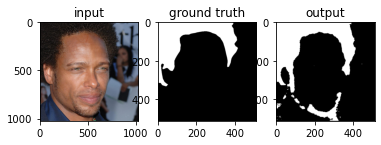

In [11]:
for x,y in test_loader:
    index = 10
    x = torch.permute(x, (0, 3, 1, 2))
    
    out = torch.squeeze(unet(x)) #output for compute test accuracy
    out_visual = out_to_mask(out[index]) #print one output result
    out_nograd = out_visual.detach().numpy()

    x = torch.permute(x, (0, 2, 3, 1))
    x_visual = x[index] #print one original image
    # x = x.detach().numpy()
    
    y_visual = torch.squeeze(y)[index] #print one original mask
    # y_1 = y_1.detach().numpy()
    
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,layout='constrained')
    ax1.imshow(x_visual)
    ax1.set_title('input')
    
    ax2.imshow(y_visual, cmap='gray')
    ax2.set_title('ground truth')
    
    ax3.imshow(out_nograd, cmap='gray')
    ax3.set_title('output')
    
    #ax1.imsave('test_input.png', x_visual)
    ax1.figure.savefig('test_input.png')
    
    extent = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('test_output.png', bbox_inches=extent)
    
    '''
    plt.subplot(1,3,1)
    plt.imshow(x_visual)
    plt.title('input')
    # plt.axis('off')
    # plt.savefig('test_input.png')
    
    plt.subplot(1,3,2)
    plt.imshow(y_visual, cmap='gray')
    plt.title('ground truth')
    
    plt.subplot(1,3,3)
    plt.imshow(out_nograd, cmap='gray')
    plt.title('output')
    # plt.axis('off')
    # plt.savefig('test_output.png')
    
    break
    
    acc_temp = acc_fn(out, y, batch_size) #compute accuracy for each batch
    acc += acc_temp #add current batch accuracy
    batch_count += 1 #count number of batches in testset

In [ ]:
acc

In [ ]:
acc = acc / batch_count
print(acc)

In [ ]:
acc = acc_fn(out, y, batch_size)